# Food Delivery Time Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d denkuznetz/food-delivery-time-prediction

Dataset URL: https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction
License(s): apache-2.0
  0%|                                               | 0.00/11.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.6k/11.6k [00:00<00:00, 5.01MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Food Delivery Time Prediction/food-delivery-time-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Food Delivery Time Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [83]:
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [84]:
df.shape

(1000, 9)

In [85]:
df.size

9000

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.732000,22.070915,8.00,41.000,55.50,71.0000,153.00


In [88]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

In [91]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan], dtype=object)

In [92]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan], dtype=object)

In [93]:
df['Weather'].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [94]:
df['Traffic_Level'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [95]:
df['Traffic_Level'].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

In [96]:
df['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning', nan], dtype=object)

In [97]:
df['Time_of_Day'].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [98]:
df['Vehicle_Type'].unique()

array(['Scooter', 'Bike', 'Car'], dtype=object)

In [99]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

## Data Visualization

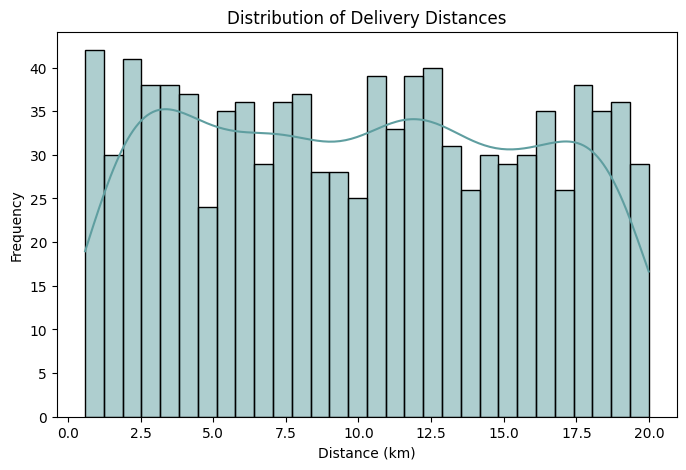

In [100]:
# Histogram – Distance Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Distance_km'], bins=30, kde=True, color='cadetblue')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Distances')
plt.show()


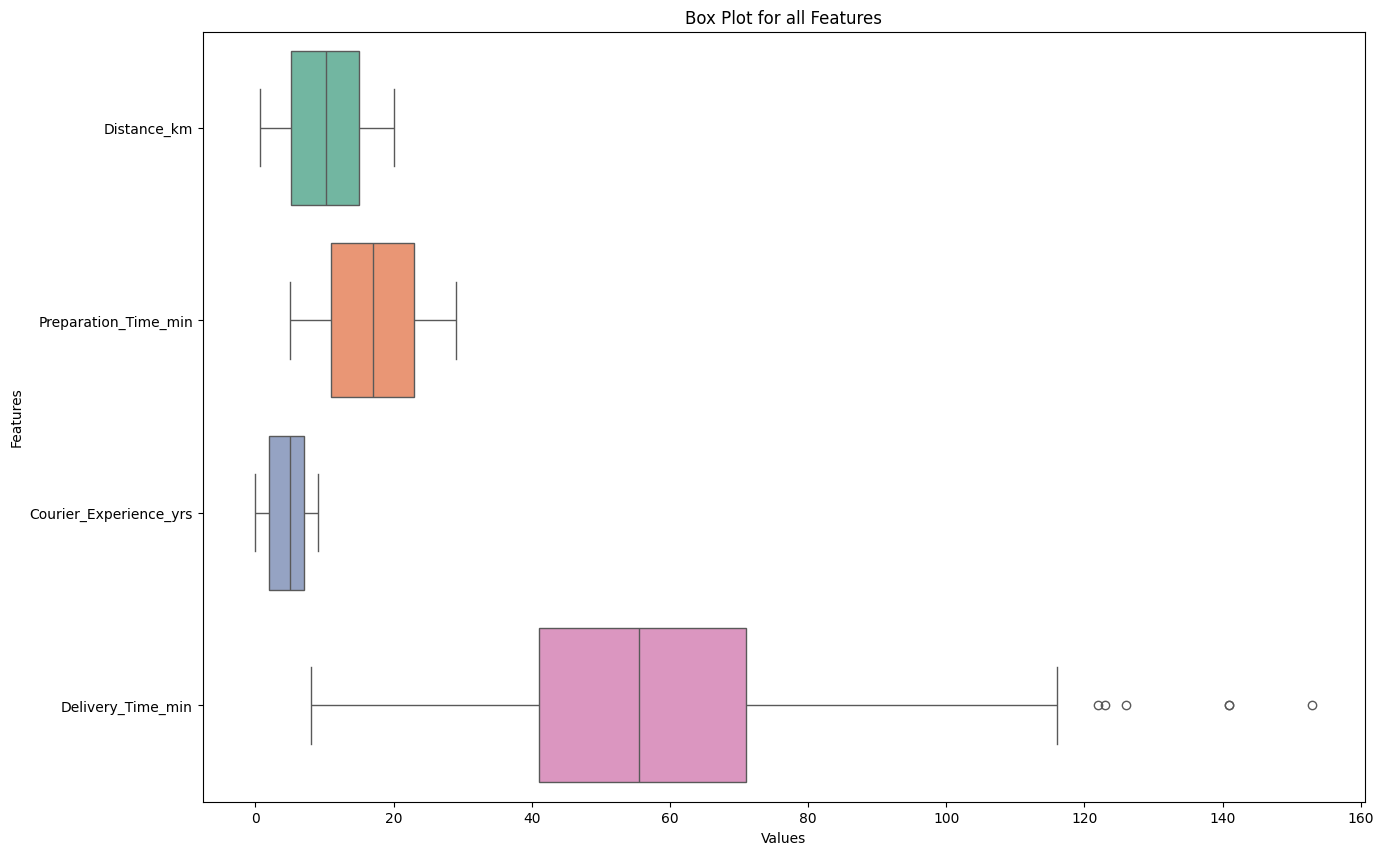

In [101]:
# Box Plot for all features 

df.drop(['Order_ID'], inplace=True, axis=1)

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.xlabel('Values')
plt.ylabel('Features')
plt.title('Box Plot for all Features')
plt.show()

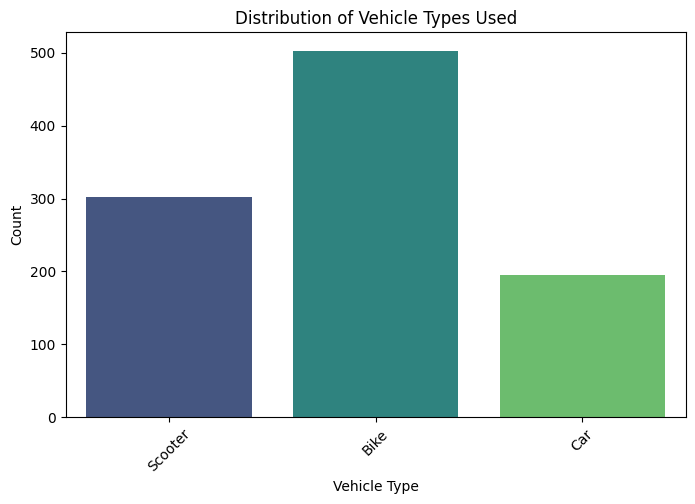

In [102]:
# Count Plot – Vehicle Type Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Vehicle_Type'], palette='viridis')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Types Used')
plt.xticks(rotation=45)
plt.show()

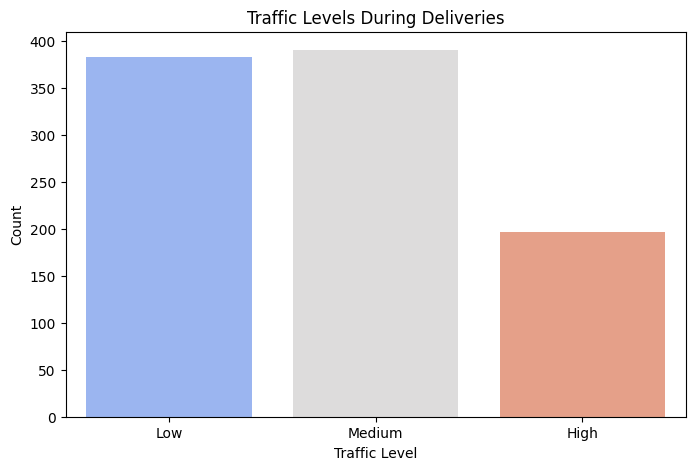

In [103]:
# Bar Plot – Traffic Level Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Traffic_Level'], palette='coolwarm')
plt.xlabel('Traffic Level')
plt.ylabel('Count')
plt.title('Traffic Levels During Deliveries')
plt.show()

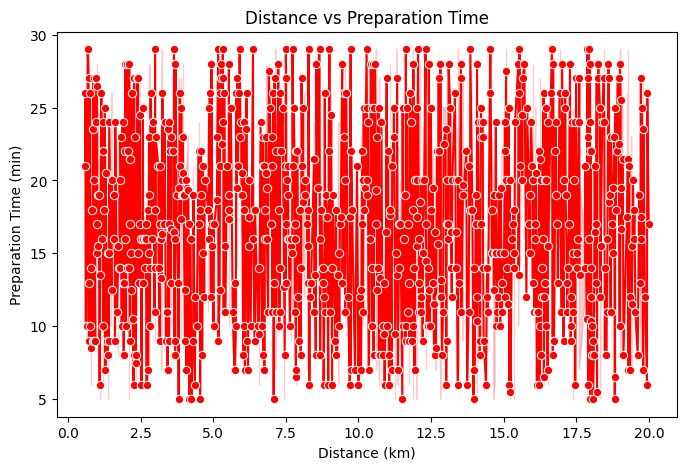

In [104]:
# Line Plot – Distance vs Preparation Time

plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Distance_km'], y=df['Preparation_Time_min'], marker='o', color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Preparation Time (min)')
plt.title('Distance vs Preparation Time')
plt.show()

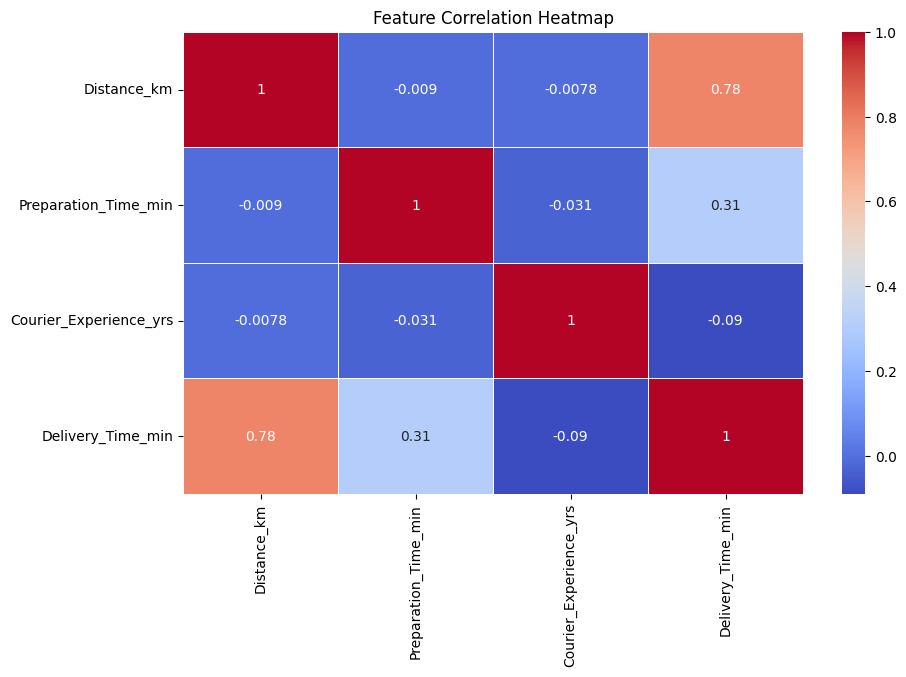

In [105]:
# Heatmap – Correlation Between Numerical Features

numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

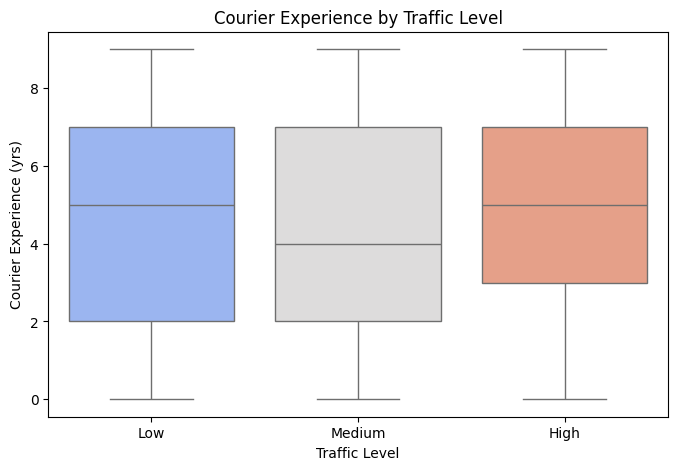

In [106]:
# Box Plot – Courier Experience by Traffic Level

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Traffic_Level'], y=df['Courier_Experience_yrs'], palette='coolwarm')
plt.xlabel('Traffic Level')
plt.ylabel('Courier Experience (yrs)')
plt.title('Courier Experience by Traffic Level')
plt.show()

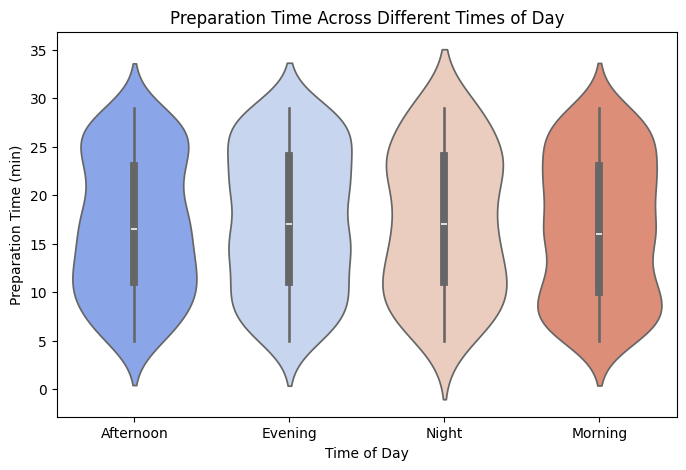

In [107]:
# Violin Plot – Preparation Time by Time of Day

plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Time_of_Day'], y=df['Preparation_Time_min'], palette='coolwarm')
plt.xlabel('Time of Day')
plt.ylabel('Preparation Time (min)')
plt.title('Preparation Time Across Different Times of Day')
plt.show()

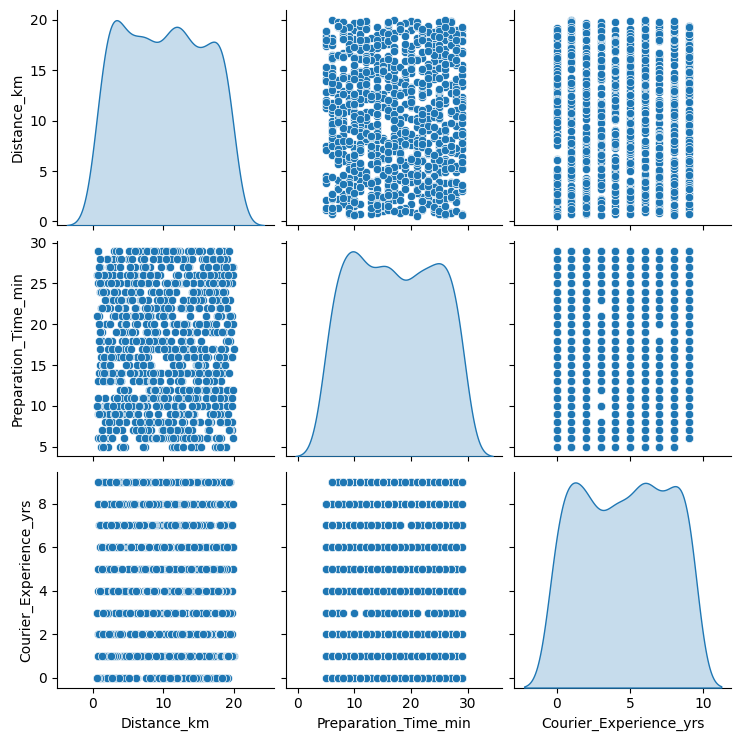

In [108]:
# Pair Plot – Relationship Between Features

sns.pairplot(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']], diag_kind='kde')
plt.show()

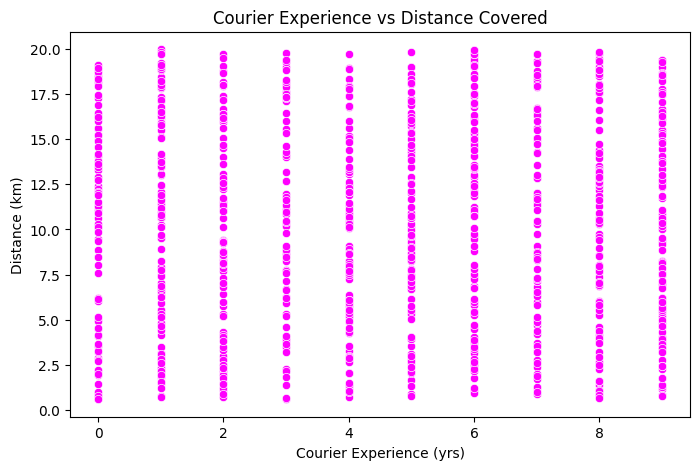

In [109]:
# Scatter Plot – Courier Experience vs Distance

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Courier_Experience_yrs'], y=df['Distance_km'], color='magenta')
plt.xlabel('Courier Experience (yrs)')
plt.ylabel('Distance (km)')
plt.title('Courier Experience vs Distance Covered')
plt.show()

## Data Preprocessing

In [110]:
# Removing outliers from Delivery_Time_min

Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Delivery_Time_min'] >= lower_bound) & (df['Delivery_Time_min'] <= upper_bound)]

In [111]:
# Catetorical Encoding

from sklearn.preprocessing import LabelEncoder

df['Traffic_Level'] = LabelEncoder().fit_transform(df['Traffic_Level'])
df['Weather'] = LabelEncoder().fit_transform(df['Weather'])
df['Time_of_Day'] = LabelEncoder().fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = LabelEncoder().fit_transform(df['Vehicle_Type'])

In [112]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X = df.drop(['Delivery_Time_min'], axis=1)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
imputer = SimpleImputer(strategy='mean')
model_li = [
    Pipeline([('imputer', imputer), ('model', Ridge())]),
    Pipeline([('imputer', imputer), ('model', XGBRegressor())]),
    Pipeline([('imputer', imputer), ('model', RandomForestRegressor())]),
    Pipeline([('imputer', imputer), ('model', AdaBoostRegressor())]),
    Pipeline([('imputer', imputer), ('model', GradientBoostingRegressor())]),
    Pipeline([('imputer', imputer), ('model', BaggingRegressor())]),
    Pipeline([('imputer', imputer), ('model', DecisionTreeRegressor())]),
    Pipeline([('imputer', imputer), ('model', SVR())]),
    Pipeline([('imputer', imputer), ('model', KNeighborsRegressor())])
]

In [ ]:
Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.8168458644927832,
 0.7913862466812134,
 0.8094262884402696,
 0.613546613147387,
 0.8162642134176953,
 0.7856564505853512,
 0.6641665180141381,
 0.7713524466456285,
 0.788909304968732]

## Model Evaluation

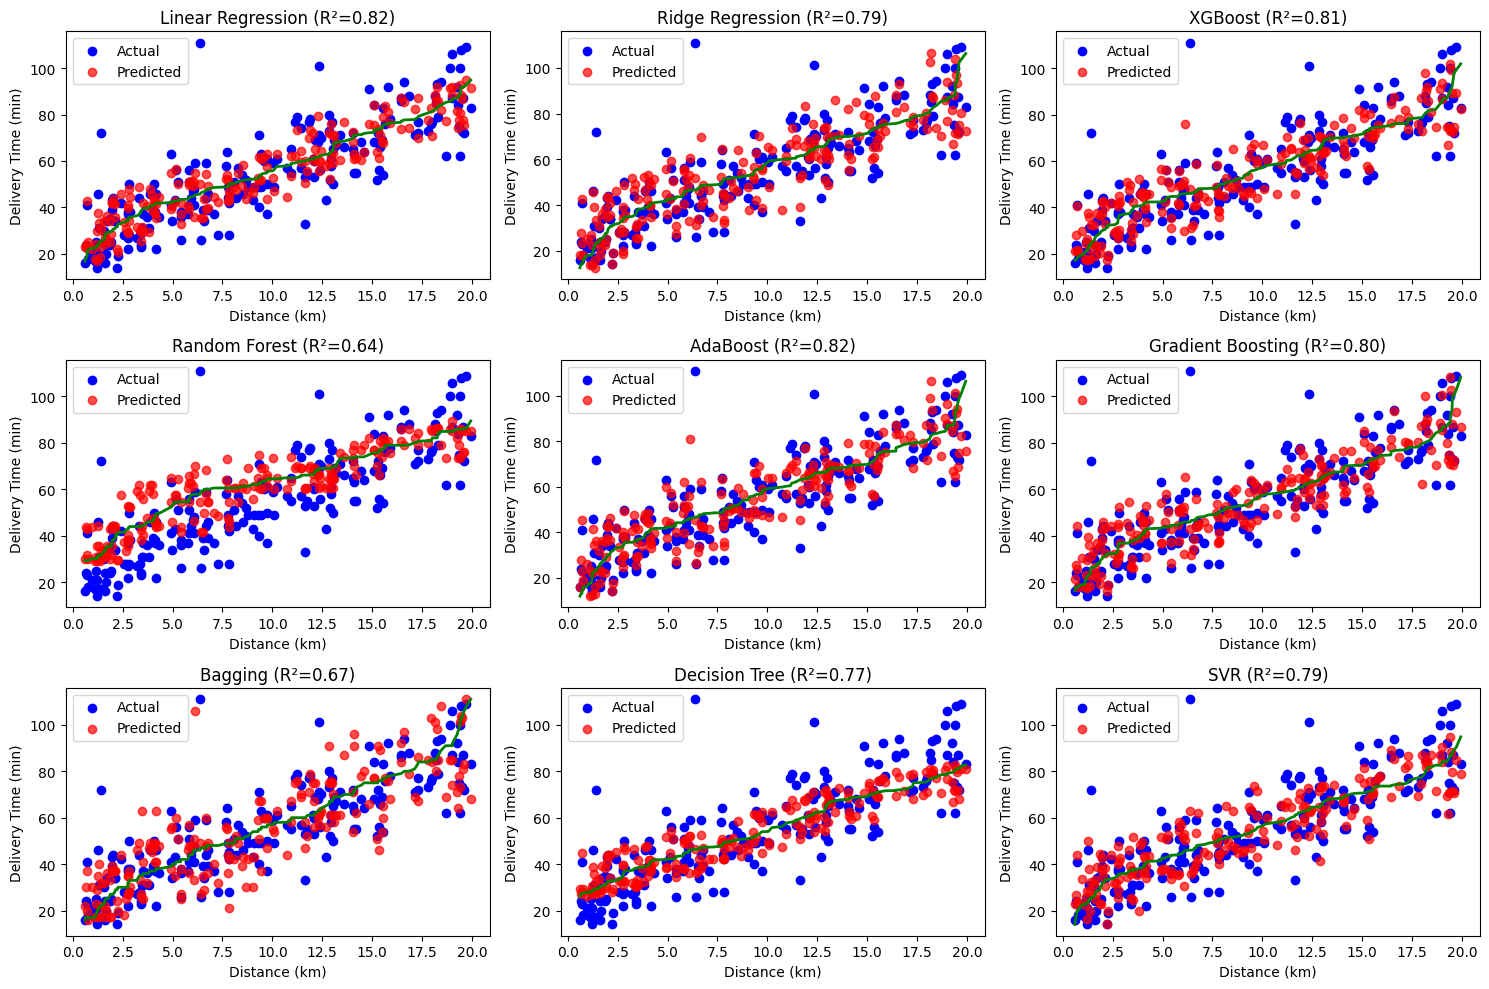

Linear Regression: R² Score = 0.8168
Ridge Regression: R² Score = 0.7914
XGBoost: R² Score = 0.8094
Random Forest: R² Score = 0.6135
AdaBoost: R² Score = 0.8163
Gradient Boosting: R² Score = 0.7857
Bagging: R² Score = 0.6642
Decision Tree: R² Score = 0.7714
SVR: R² Score = 0.7889
KNN: R² Score = 0.8168


In [126]:
model_names = ["Linear Regression", "Ridge Regression", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Decision Tree", "SVR", "KNN"]

plt.figure(figsize=(15, 10))

for i, model in enumerate(model_li):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    Score.append(r2)

    plt.subplot(3, 3, i+1)
    plt.scatter(X_test['Distance_km'], y_test, color='blue', label="Actual")
    plt.scatter(X_test['Distance_km'], y_pred, color='red', label="Predicted", alpha=0.7)
    plt.plot(np.sort(X_test['Distance_km']), np.sort(y_pred), color='green', linewidth=2)
    plt.title(f"{model_names[i]} (R²={r2:.2f})")
    plt.xlabel("Distance (km)")
    plt.ylabel("Delivery Time (min)")
    plt.legend()

plt.tight_layout()
plt.show()

for name, score in zip(model_names, Score):
    print(f"{name}: R² Score = {score:.4f}")